# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I am a British Airways Gold ...
1,Not Verified | Another case of reviewing Brit...
2,✅ Trip Verified | On the memorable day of Janu...
3,Not Verified | I did not actually get to fly w...
4,✅ Trip Verified | We had possibly the worse ch...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [10]:
data = pd.read_csv("BA_reviews.csv")

In [11]:
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I am a British Airways Gold ...
1,1,Not Verified | Another case of reviewing Brit...
2,2,✅ Trip Verified | On the memorable day of Janu...
3,3,Not Verified | I did not actually get to fly w...
4,4,✅ Trip Verified | We had possibly the worse ch...


In [9]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
# Data Cleaning
# Remove any special characters, emojis, and other non-alphanumeric characters
data['clean_reviews'] = data['reviews'].str.replace('[^\w\s]|_+', '')

<ipython-input-12-8096504d908f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_reviews'] = data['reviews'].str.replace('[^\w\s]|_+', '')


In [13]:
# Sentiment Analysis
# Calculate sentiment polarity for each review
data['sentiment'] = data['clean_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
# Display the sentiment polarity for each review
data[['clean_reviews', 'sentiment']]

,clean_reviews,sentiment
0,Trip Verified I am a British Airways Gold Gu...,0.155000
1,Not Verified Another case of reviewing Briti...,0.116667
2,Trip Verified On the memorable day of Januar...,0.208958
3,Not Verified I did not actually get to fly wi...,0.266667
4,Trip Verified We had possibly the worse chec...,0.045833
...,...,...
995,Trip Verified Gatwick to Mauritius My wife ...,-0.195000
996,Not Verified Flew out of Heathrow on 22nd Fe...,0.384091
997,Trip Verified Horrible flight BA from Gatwi...,-0.096142
998,Trip Verified New York to Venice via London...,-0.069430


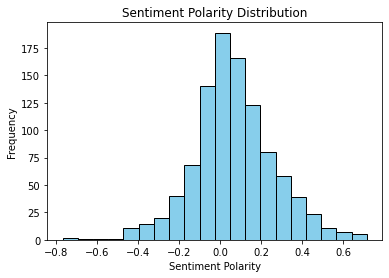

In [16]:
# Visualize the distribution of sentiment polarity
plt.hist(data['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

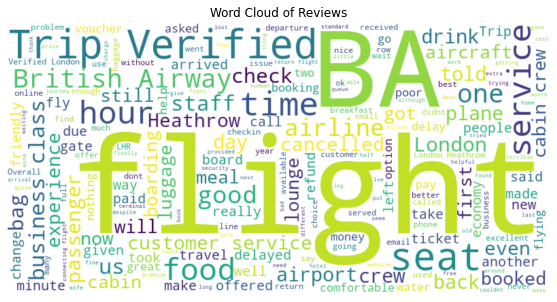

In [18]:
# Word Cloud
# Generate word cloud from the cleaned reviews
text = ' '.join(data['clean_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
# Topic Modelling
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['clean_reviews'])

In [21]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [22]:
# Display the topics and their top words
print("Topics found via LDA:")
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i+1}:")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print()

Topics found via LDA:
Topic #1:
['food', 'time', 'cabin', 'ba', 'service', 'trip', 'good', 'verified', 'crew', 'flight']

Topic #2:
['customer', 'told', 'london', 'airways', 'british', 'hours', 'trip', 'verified', 'ba', 'flight']

Topic #3:
['food', 'seats', 'seat', 'service', 'business', 'trip', 'verified', 'class', 'ba', 'flight']

Topic #4:
['london', 'food', 'did', 'service', 'seats', 'seat', 'trip', 'verified', 'ba', 'flight']

Topic #5:
['despite', 'und', 'crew', 'london', 'wir', 'mr', 'verified', 'trip', 'british', 'airways']



In [23]:
# Explore Review Length
data['review_length'] = data['clean_reviews'].apply(len)

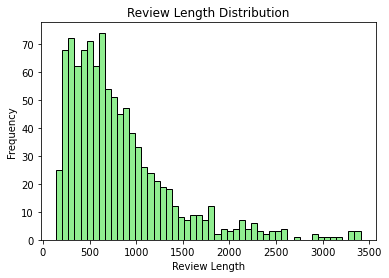

In [24]:
# Plotting review length distribution
plt.hist(data['review_length'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Identify Most Frequent Words
# Compute the frequency of words in the reviews
word_freq = pd.Series(' '.join(data['clean_reviews']).split()).value_counts()[:20]

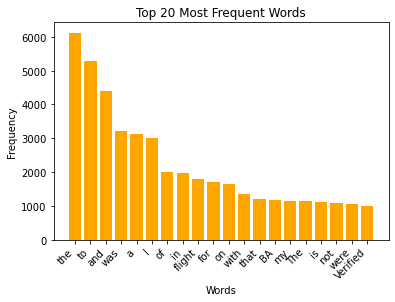

In [26]:
# Plotting the most frequent words
plt.bar(word_freq.index, word_freq.values, color='orange')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

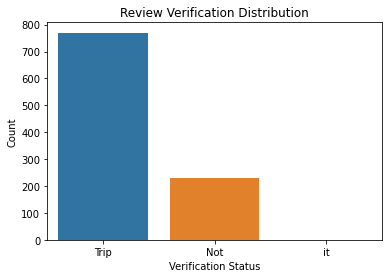

In [33]:
import seaborn as sns

# Review Verification Distribution
verification_distribution = data['reviews'].str.extract(r'(\b[Not|Trip]+\b)')
verification_distribution.columns = ['Verification']
verification_distribution['Verification'] = verification_distribution['Verification'].str.split().str[0]
sns.countplot(x='Verification', data=verification_distribution)
plt.title('Review Verification Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

In [35]:
print(data.columns)

Index(['Unnamed: 0', 'reviews', 'clean_reviews', 'sentiment', 'review_length'], dtype='object')


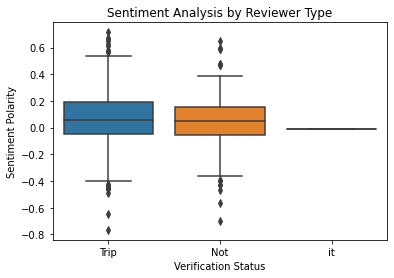

In [36]:
# Extract verification status from the 'reviews' column
data['verification'] = data['reviews'].str.extract(r'(\b[Not|Trip]+\b)')
data['verification'] = data['verification'].str.split().str[0]

# Plotting boxplot based on the correct column name
sns.boxplot(x='verification', y='sentiment', data=data)
plt.title('Sentiment Analysis by Reviewer Type')
plt.xlabel('Verification Status')
plt.ylabel('Sentiment Polarity')
plt.show()

In [37]:
# Named Entity Recognition (NER) - Using SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")

# Define a function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'GPE']]
    return entities

C:\Users\BASHEER-PC\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [38]:
# Apply the function to the reviews
data['named_entities'] = data['clean_reviews'].apply(extract_named_entities)


In [39]:
# Flatten the list of named entities
named_entities_flat = [item for sublist in data['named_entities'] for item in sublist]

In [40]:
# Count the frequency of named entities
named_entities_freq = pd.Series(named_entities_flat).value_counts()[:10]

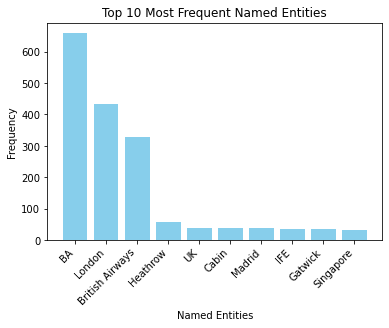

In [41]:
# Plot the most frequent named entities
plt.bar(named_entities_freq.index, named_entities_freq.values, color='skyblue')
plt.title('Top 10 Most Frequent Named Entities')
plt.xlabel('Named Entities')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
from collections import Counter
import nltk
nltk.download('punkt')  # Ensure that the punkt tokenizer is downloaded

# Tokenize the text and flatten the list of tokens
tokens = [word for review in data['clean_reviews'] for word in nltk.word_tokenize(review)]

# Calculate word frequency using Counter
word_freq = Counter(tokens)

# Display the top 20 most frequent words
print(word_freq.most_common(20))


[nltk_data] Downloading package punkt to C:\Users\BASHEER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('the', 6122), ('to', 5279), ('and', 4389), ('was', 3218), ('a', 3136), ('I', 3007), ('of', 2015), ('in', 1981), ('flight', 1802), ('for', 1695), ('on', 1636), ('with', 1352), ('that', 1190), ('BA', 1172), ('my', 1146), ('The', 1146), ('is', 1122), ('not', 1120), ('were', 1067), ('Verified', 1000)]


In [45]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\BASHEER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\BASHEER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BASHEER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# Tokenization, Lowercasing, Lemmatization, and Removing Stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [token.lower() for token in tokens if token.isalpha()]  # Lowercasing
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    tokens = [token for token in tokens if token not in stop_words]  # Removing Stopwords
    return tokens

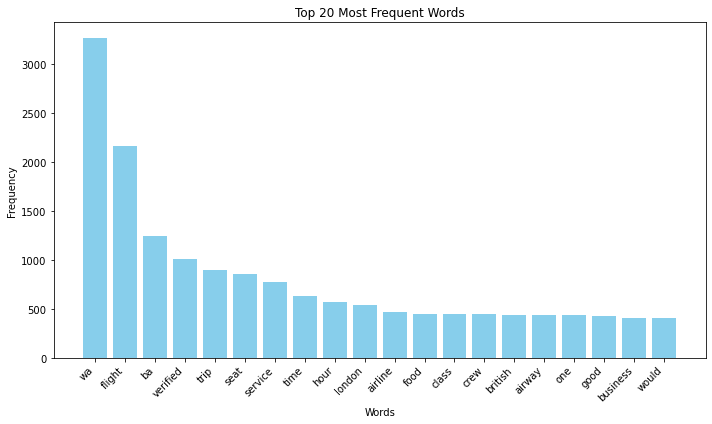

In [47]:
# Apply preprocessing to each review
data['clean_tokens'] = data['reviews'].apply(preprocess_text)

# Calculate word frequency
word_freq = Counter([word for tokens in data['clean_tokens'] for word in tokens])

# Visualize the top 20 most frequent words
top_words = [pair[0] for pair in word_freq.most_common(20)]
word_counts = [pair[1] for pair in word_freq.most_common(20)]

plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

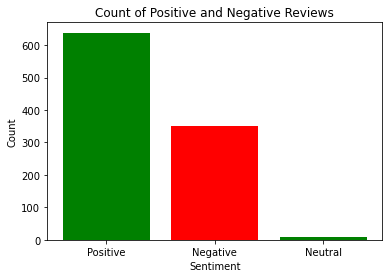

In [48]:
# Perform sentiment analysis
def analyze_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review
data['sentiment'] = data['reviews'].apply(analyze_sentiment)

# Count positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Visualize positive and negative reviews
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Count of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

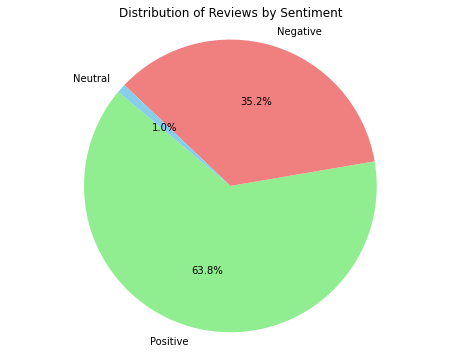

In [66]:
# Count positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'], startangle=140)
plt.title('Distribution of Reviews by Sentiment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [49]:
# Print the number of positive and negative reviews
print("Number of Positive Reviews:", sentiment_counts['Positive'])
print("Number of Negative Reviews:", sentiment_counts['Negative'])

Number of Positive Reviews: 638
Number of Negative Reviews: 352


In [53]:
# Perform sentiment analysis
def analyze_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review
data['sentiment'] = data['reviews'].apply(analyze_sentiment)


# Filter out positive and negative reviews
positive_reviews = data[data['sentiment'] == 'Positive']
negative_reviews = data[data['sentiment'] == 'Negative']

# Define keywords indicating satisfaction and dissatisfaction
positive_keywords = ['happy', 'satisfied', 'great', 'excellent', 'awesome']
negative_keywords = ['unsatisfied', 'disappointed', 'terrible', 'poor', 'awful']

# Sum the counts of positive and negative reviews
total_positive_count = positive_count.sum()
total_negative_count = negative_count.sum()

# Determine if customers are happy or unsatisfied based on total keyword counts
if total_positive_count > total_negative_count:
    print("Customers are generally happy.")
elif total_negative_count > total_positive_count:
    print("Customers are generally unsatisfied.")
else:
    print("Mixed sentiments among customers.")


Customers are generally happy.


In [59]:
import pandas as pd
from collections import Counter
import re

# Define key phrases related to airline services
service_phrases = [
    'in-flight entertainment', 'seat comfort', 
    'food quality', 'punctuality', 'baggage handling', 'boarding process'
]

# Define a function to count mentions of service phrases in a review
def count_service_mentions(review):
    mention_counts = Counter()
    for phrase in service_phrases:
        mention_counts[phrase] = len(re.findall(phrase, review, re.IGNORECASE))
    return mention_counts

# Apply the function to each review
data['service_mentions'] = data['reviews'].apply(count_service_mentions)

# Sum the counts of service mentions across all reviews
total_service_mentions = sum(data['service_mentions'], Counter())

# Display the total counts of service mentions
print("Total Service Mentions:")
for phrase, count in total_service_mentions.items():
    print(f"{phrase}: {count}")


Total Service Mentions:
seat comfort: 7
food quality: 8
punctuality: 4
boarding process: 12
in-flight entertainment: 9
baggage handling: 5


In [60]:
# Define a function to extract sentences containing service phrases
def extract_service_sentences(review):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', review)
    service_sentences = []
    for sentence in sentences:
        if any(phrase.lower() in sentence.lower() for phrase in service_phrases):
            service_sentences.append(sentence)
    return service_sentences

# Apply the function to each review
data['service_sentences'] = data['reviews'].apply(extract_service_sentences)

# Define a function to perform sentiment analysis on service sentences
def analyze_service_sentiment(sentences):
    if not sentences:
        return 'Neutral'

    sentiment_scores = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)

    if avg_sentiment > 0:
        return 'Positive'
    elif avg_sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review's service sentences
data['service_sentiment'] = data['service_sentences'].apply(analyze_service_sentiment)

# Display the results
service_sentiment_counts = data['service_sentiment'].value_counts()
print("Sentiment about Airline Services:")
print(service_sentiment_counts)

Sentiment about Airline Services:
Neutral     966
Positive     19
Negative     15
Name: service_sentiment, dtype: int64


In [61]:
# Apply sentiment analysis to each review's service sentences
data['service_sentiment'] = data['service_sentences'].apply(analyze_service_sentiment)

# Display the sentiment for each service phrase
service_sentiment_summary = {}
for phrase in service_phrases:
    service_sentiment_summary[phrase] = data[data['reviews'].str.contains(phrase, case=False)]['service_sentiment'].value_counts()

# Print the sentiment summary for each service phrase
for phrase, sentiment_counts in service_sentiment_summary.items():
    print(f"{phrase}:")
    print(sentiment_counts)
    print()

# Determine the best service based on sentiment
positive_counts = {phrase: counts.get('Positive', 0) for phrase, counts in service_sentiment_summary.items()}
best_service = max(positive_counts, key=positive_counts.get)
print(f"The best service based on sentiment is: {best_service}")

in-flight entertainment:
Positive    5
Neutral     2
Negative    2
Name: service_sentiment, dtype: int64

seat comfort:
Positive    6
Negative    1
Name: service_sentiment, dtype: int64

food quality:
Negative    3
Positive    2
Neutral     1
Name: service_sentiment, dtype: int64

punctuality:
Positive    2
Negative    2
Name: service_sentiment, dtype: int64

baggage handling:
Negative    3
Neutral     2
Name: service_sentiment, dtype: int64

boarding process:
Positive    4
Neutral     4
Negative    4
Name: service_sentiment, dtype: int64

The best service based on sentiment is: seat comfort


In [63]:
import pandas as pd
from collections import Counter
import re



# Define a regular expression pattern to match country names
country_pattern = r'\b(?:Afghanistan|Albania|Algeria|Andorra|Angola|Antigua and Barbuda|Argentina|Armenia|Australia|Austria|Azerbaijan|Bahamas|Bahrain|Bangladesh|Barbados|Belarus|Belgium|Belize|Benin|Bhutan|Bolivia|Bosnia and Herzegovina|Botswana|Brazil|Brunei|Bulgaria|Burkina Faso|Burundi|Cabo Verde|Cambodia|Cameroon|Canada|Central African Republic|Chad|Chile|China|Colombia|Comoros|Congo|Costa Rica|Croatia|Cuba|Cyprus|Czechia|Côte d Ivoire|Denmark|Djibouti|Dominica|Dominican Republic|Ecuador|Egypt|El Salvador|Equatorial Guinea|Eritrea|Estonia|Eswatini|Ethiopia|Fiji|Finland|France|Gabon|Gambia|Georgia|Germany|Ghana|Greece|Grenada|Guatemala|Guinea|Guinea-Bissau|Guyana|Haiti|Honduras|Hungary|Iceland|India|Indonesia|Iran|Iraq|Ireland|Israel|Italy|Jamaica|Japan|Jordan|Kazakhstan|Kenya|Kiribati|Kuwait|Kyrgyzstan|Laos|Latvia|Lebanon|Lesotho|Liberia|Libya|Liechtenstein|Lithuania|Luxembourg|Madagascar|Malawi|Malaysia|Maldives|Mali|Malta|Marshall Islands|Mauritania|Mauritius|Mexico|Micronesia|Moldova|Monaco|Mongolia|Montenegro|Morocco|Mozambique|Myanmar|Namibia|Nauru|Nepal|Netherlands|New Zealand|Nicaragua|Niger|Nigeria|North Korea|North Macedonia|Norway|Oman|Pakistan|Palau|Palestine|Panama|Papua New Guinea|Paraguay|Peru|Philippines|Poland|Portugal|Qatar|Romania|Russia|Rwanda|Saint Kitts and Nevis|Saint Lucia|Saint Vincent and the Grenadines|Samoa|San Marino|Sao Tome and Principe|Saudi Arabia|Senegal|Serbia|Seychelles|Sierra Leone|Singapore|Slovakia|Slovenia|Solomon Islands|Somalia|South Africa|South Korea|South Sudan|Spain|Sri Lanka|Sudan|Suriname|Sweden|Switzerland|Syria|Taiwan|Tajikistan|Tanzania|Thailand|Timor-Leste|Togo|Tonga|Trinidad and Tobago|Tunisia|Turkey|Turkmenistan|Tuvalu|Uganda|Ukraine|United Arab Emirates|United Kingdom|United States|Uruguay|Uzbekistan|Vanuatu|Vatican City|Venezuela|Vietnam|Yemen|Zambia|Zimbabwe)\b'

# Define a function to extract country names from text
def extract_countries(text):
    return re.findall(country_pattern, text)

# Apply the function to each review and flatten the list of country names
data['countries'] = data['reviews'].apply(extract_countries)
country_list = [country for sublist in data['countries'] for country in sublist]

# Count occurrences of each country name
country_counts = Counter(country_list)

# Find the country with the highest count of reviews
majority_country = max(country_counts, key=country_counts.get)
majority_reviews_count = country_counts[majority_country]

print(f"The majority of reviews are from {majority_country} with {majority_reviews_count} reviews.")


The majority of reviews are from Singapore with 39 reviews.


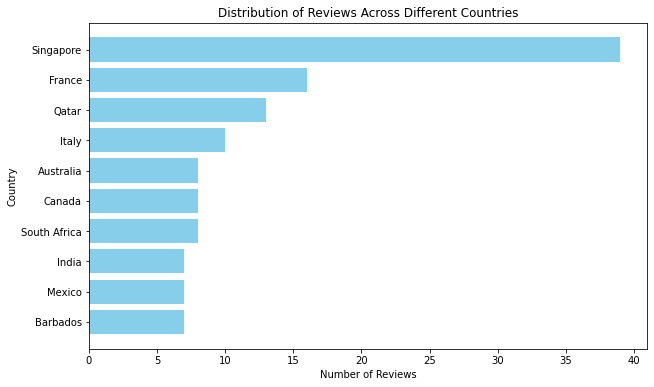

In [64]:
# Define a function to extract country names from text
def extract_countries(text):
    return re.findall(country_pattern, text)

# Apply the function to each review and flatten the list of country names
data['countries'] = data['reviews'].apply(extract_countries)
country_list = [country for sublist in data['countries'] for country in sublist]

# Count occurrences of each country name
country_counts = Counter(country_list)

# Sort the countries by count in descending order
sorted_countries = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 countries and their corresponding review counts
top_countries = [country[0] for country in sorted_countries[:10]]
review_counts = [country[1] for country in sorted_countries[:10]]

# Create a bar chart to visualize the distribution of reviews across different countries
plt.figure(figsize=(10, 6))
plt.barh(top_countries, review_counts, color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.title('Distribution of Reviews Across Different Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display the country with the highest review count at the top
plt.show()